# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
porterdata = pd.read_csv("porter_data_1.csv")

In [3]:
porterdata.head()


market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porterdata["created_at"] = pd.to_datetime(porterdata['created_at'])
porterdata["actual_delivery_time"] = pd.to_datetime(porterdata["actual_delivery_time"])
porterdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
porterdata["order_protocol"] = porterdata["order_protocol"].astype("category")
porterdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
porterdata["time_taken_min"] = (porterdata["actual_delivery_time"] - porterdata["created_at"])/ pd.Timedelta(minutes=1)
porterdata["time_taken_min"]


0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: time_taken_min, Length: 175777, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp
porterdata["created_hour"] = porterdata["created_at"].dt.hour
porterdata["created_weeknum"] = porterdata["created_at"].dt.weekday

# Create a categorical feature 'isWeekend'

porterdata["isweekend"] = porterdata["created_weeknum"].apply(lambda x: 1 if x >= 5 else 0 )
porterdata["isweekend"] 


0         0
1         0
2         0
3         0
4         0
         ..
175772    0
175773    0
175774    1
175775    1
175776    1
Name: isweekend, Length: 175777, dtype: int64

In [8]:
# Drop unnecessary columns
porterdata = porterdata.drop('created_weeknum', axis=1)
porterdata = porterdata.drop('created_at', axis=1)
porterdata = porterdata.drop('actual_delivery_time', axis=1)
porterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  float64 
 1   store_primary_category    175777 non-null  int64   
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken_min            175777 non-null  float64 
 13  created_hour              175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
# time_taken_min is y variable  rest are features


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [34]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(porterdata, train_size = 0.7, test_size = 0.3, random_state = 100)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_vars = ["total_items", "subtotal","num_distinct_items","min_item_price","max_item_price","total_onshift_dashers","total_busy_dashers","total_outstanding_orders","distance", "created_hour"]
cat_vars = ["store_primary_category","order_protocol","isweekend"]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

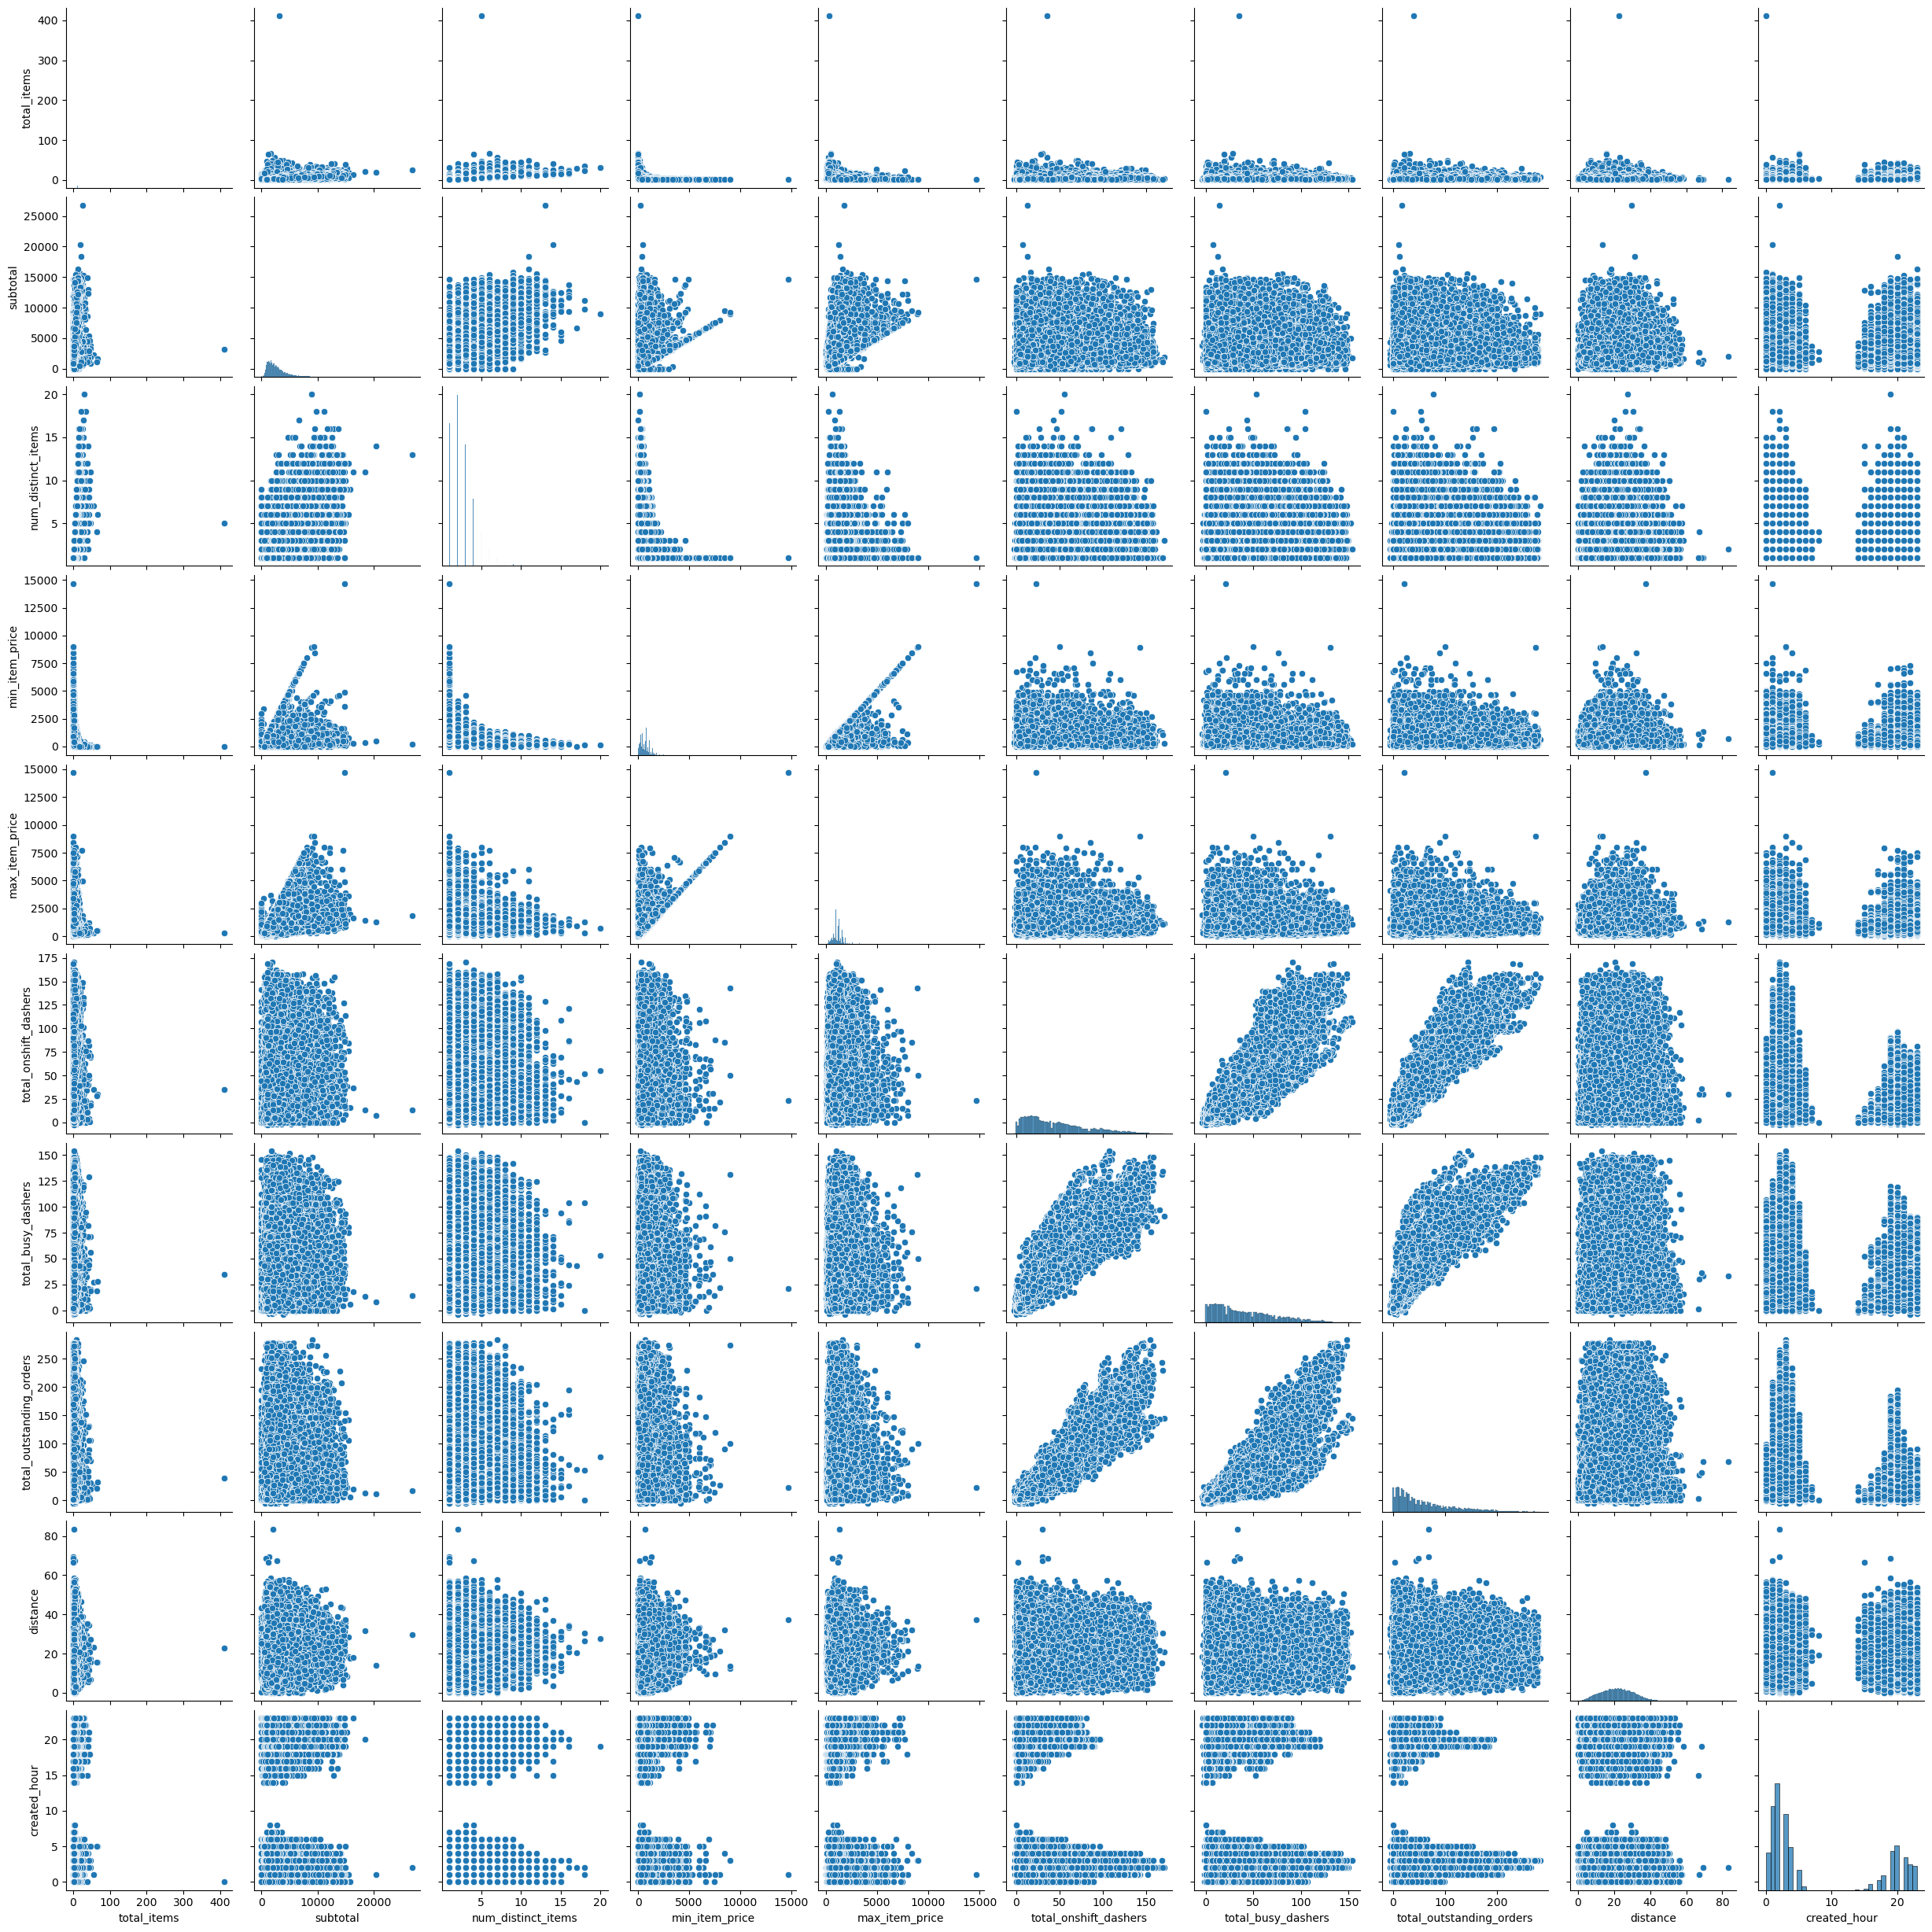

In [25]:
# Plot distributions for all numerical columns

sns.pairplot(data=df_train[num_vars])
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [26]:
# Distribution of categorical columns
sns.pairplot(data=df_train[cat_vars])
plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [27]:
# Distribution of time_taken
fig = plt.figure()
sns.distplot(df_train["time_taken_min"], bins = 15)
fig.suptitle('Time Taken', fontsize = 15)                  # Plot heading 
plt.xlabel('Time Taken', fontsize = 15)         # X-label
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



In [28]:
# Show the distribution of time_taken for different hours
plt.figure(figsize = (10,5))
plt.scatter(df_train["created_hour"],df_train["time_taken_min"], s=5, alpha=1)
plt.xlabel('Created Hour')
plt.ylabel('Time Taken')
plt.title('Created Hours / Time Taken')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

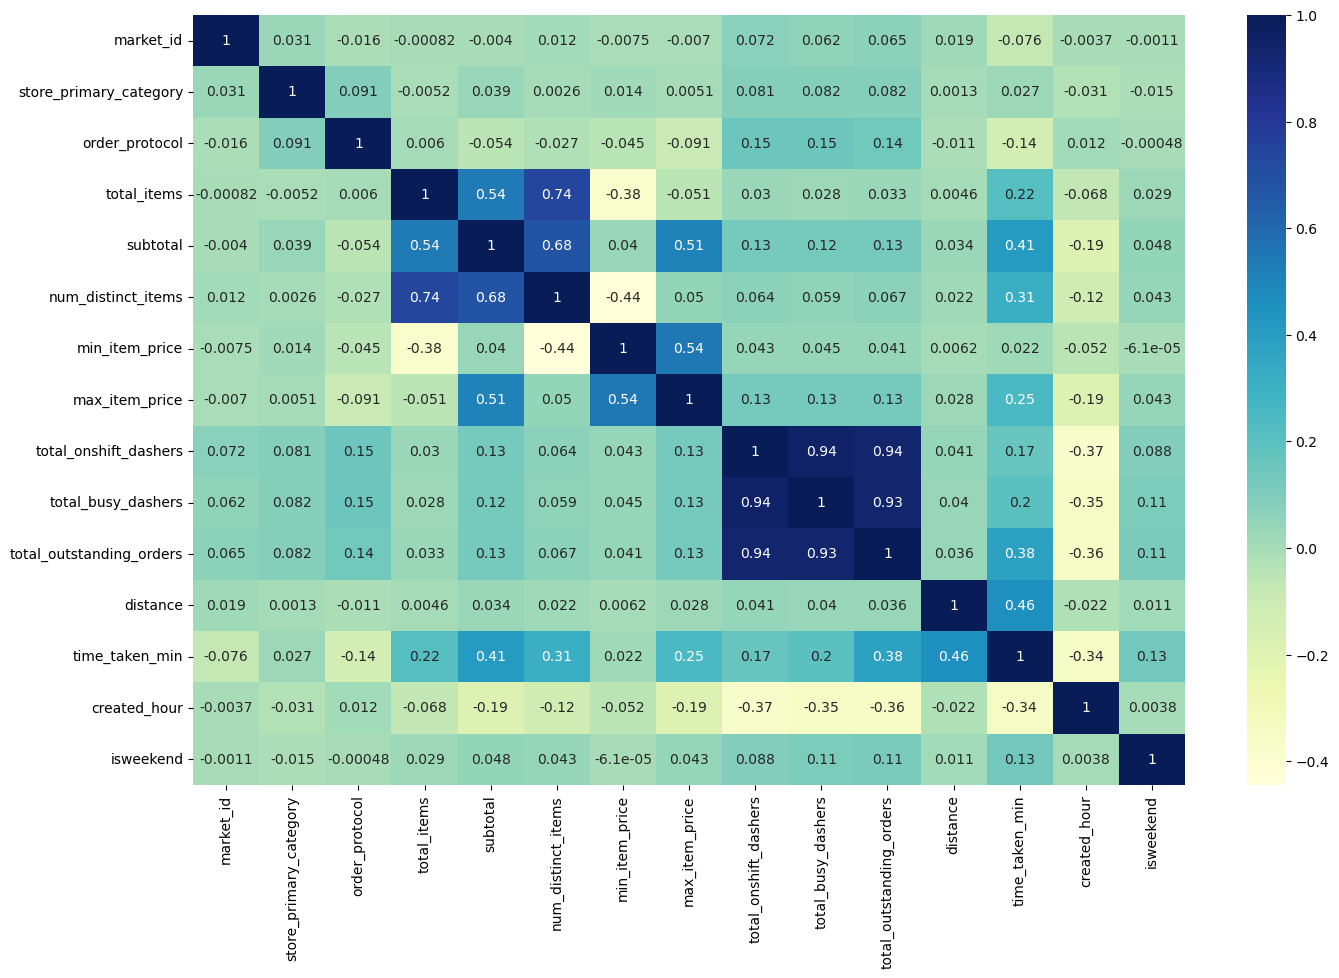

In [27]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [36]:
# Drop 3-5 weakly correlated columns from training dataset
df_train = df_train.drop('market_id', axis=1)
df_train = df_train.drop('store_primary_category', axis=1)
df_train = df_train.drop('order_protocol', axis=1)
df_train = df_train.drop('min_item_price', axis=1)
df_train = df_train.drop('total_onshift_dashers', axis=1)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 94746 to 38408
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               123036 non-null  int64  
 1   subtotal                  123036 non-null  int64  
 2   num_distinct_items        123036 non-null  int64  
 3   max_item_price            123036 non-null  int64  
 4   total_busy_dashers        123036 non-null  float64
 5   total_outstanding_orders  123036 non-null  float64
 6   distance                  123036 non-null  float64
 7   time_taken_min            123036 non-null  float64
 8   created_hour              123036 non-null  int32  
 9   isweekend                 123036 non-null  int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 9.9 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [30]:
# Boxplot for time_taken
#plt.figure(figsize = (20,5))
sns.boxplot(df_train.time_taken_min)
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [37]:
# Handle outliers
df_train = df_train[df_train.time_taken_min <= 100]
df_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  123036.000000  123036.000000       123036.000000   123036.000000   
mean        3.206110    2697.820532            2.674949     1160.409449   
std         2.745098    1830.342034            1.625565      562.952192   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1417.000000            2.000000      799.000000   
50%         3.000000    2220.000000            2.000000     1095.000000   
75%         4.000000    3405.000000            3.000000     1395.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       123036.000000             123036.000000  123036.000000   
mean            41.877451                 58.269685      21.829444   
std             32.149554                 52.682444       8.764719   
min             -4.000000                 -6.000000       0.000000   
25%             15.000000                 17.000000      15.320000   
50%             35.000000                 41.000000      21.760000   
75%             63.000000                 85.000000      28.120000   
max            154.000000                283.000000      83.520000   

       time_taken_min   created_hour      isweekend  
count   123036.000000  123036.000000  123036.000000  
mean        46.189514       8.467619       0.345980  
std          9.323131       8.678580       0.475689  
min         32.000000       0.000000       0.000000  
25%         39.000000       2.000000       0.000000  
50%         45.000000       3.000000       0.000000  
75%         52.000000      19.000000       1.000000  
max         99.000000      23.000000       1.000000

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [38]:
# Plot distributions for all numerical columns
sns.pairplot(data=df_test[num_vars])
plt.show()


##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns
sns.pairplot(data=df_test[cat_vars])
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [39]:
# Distribution of time_taken
fig = plt.figure()
sns.distplot(df_test["time_taken_min"], bins = 15)
fig.suptitle('Time Taken', fontsize = 15)                  # Plot heading 
plt.xlabel('Time Taken', fontsize = 15)         # X-label
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

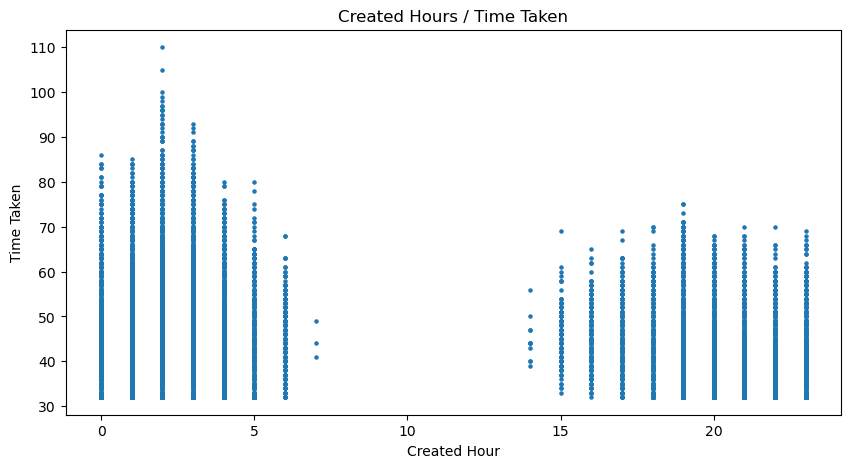

In [40]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize = (10,5))
plt.scatter(df_test["created_hour"],df_test["time_taken_min"], s=5, alpha=1)
plt.xlabel('Created Hour')
plt.ylabel('Time Taken')
plt.title('Created Hours / Time Taken')
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

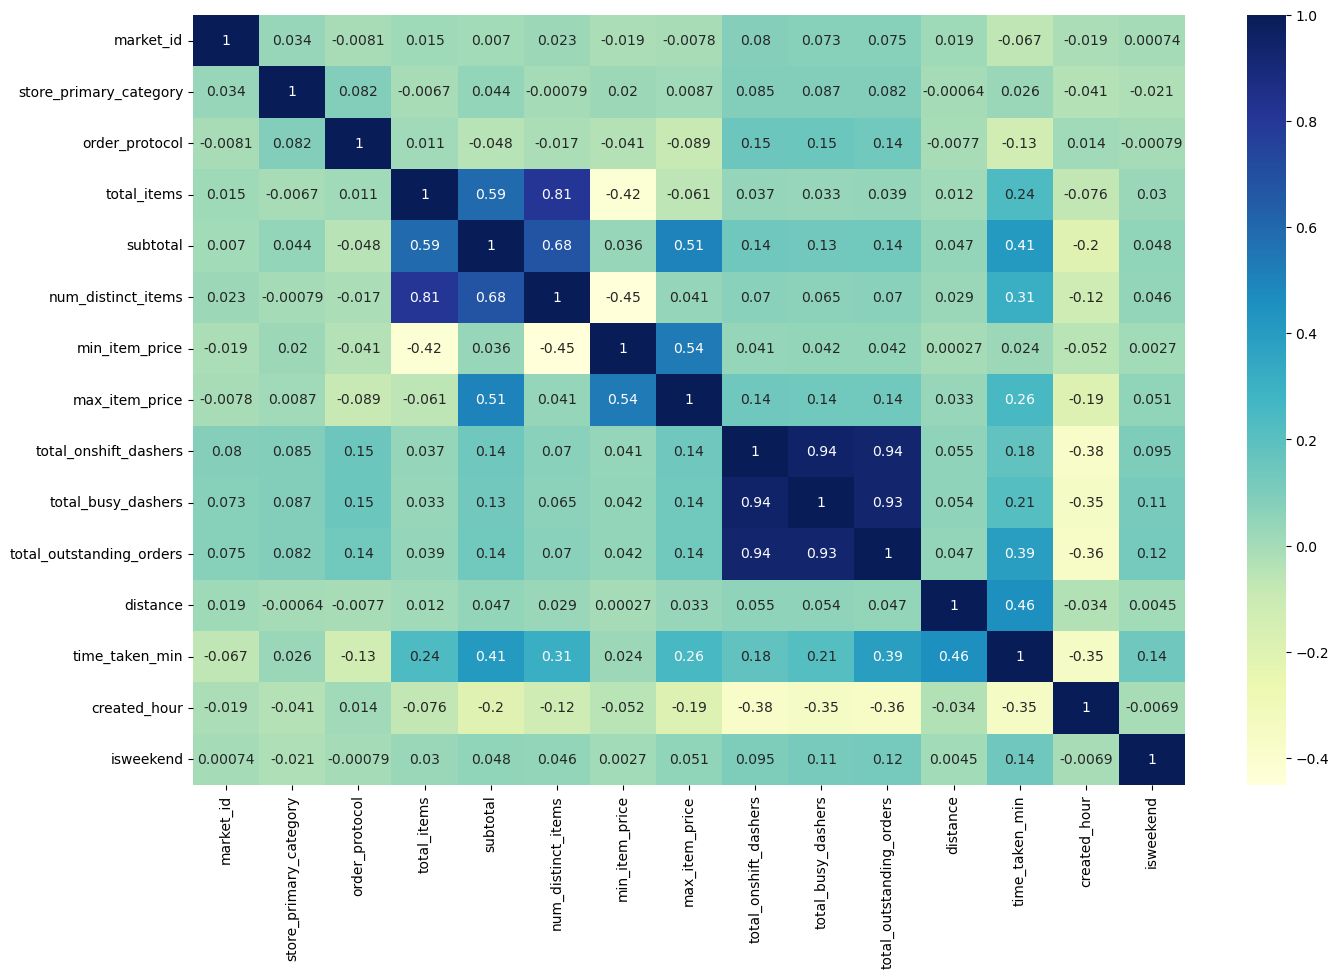

In [41]:
# Drop the weakly correlated columns from training dataset
plt.figure(figsize = (16, 10))
sns.heatmap(df_test.corr(), annot = True, cmap="YlGnBu")
plt.show()


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [45]:
# Import libraries
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


In [43]:
df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746             2      1790                   2             995   
173338            1       845                   1             795   
37592             1      1900                   1            1200   
42763             6       463                   3             299   
27506             3      3500                   3            1200   

        total_busy_dashers  total_outstanding_orders  distance  \
94746                  9.0                      15.0     18.04   
173338                76.0                     136.0     24.28   
37592                 21.0                      28.0     28.24   
42763                 87.0                     129.0     13.88   
27506                 13.0                      17.0      8.00   

        time_taken_min  created_hour  isweekend  
94746             41.0            18          0  
173338            41.0             2          1  
37592             44.0            23          1  
42763             40.0             1          1  
27506             44.0             5          1

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [47]:
num_vars = ["total_items", "subtotal","num_distinct_items","max_item_price","total_busy_dashers","total_outstanding_orders","distance", "created_hour"]


In [48]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [49]:
df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
94746      0.002439  0.066791            0.052632        0.067687   
173338     0.000000  0.031530            0.000000        0.054082   
37592      0.000000  0.070896            0.000000        0.081633   
42763      0.012195  0.017276            0.105263        0.020340   
27506      0.004878  0.130597            0.105263        0.081633   

        total_busy_dashers  total_outstanding_orders  distance  \
94746             0.082278                  0.072664  0.215996   
173338            0.506329                  0.491349  0.290709   
37592             0.158228                  0.117647  0.338123   
42763             0.575949                  0.467128  0.166188   
27506             0.107595                  0.079585  0.095785   

        time_taken_min  created_hour  isweekend  
94746             41.0      0.782609          0  
173338            41.0      0.086957          1  
37592             44.0      1.000000          1  
42763             40.0      0.043478          1  
27506             44.0      0.217391          1

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [50]:
# Create/Initialise the model
y_train = df_train.pop('time_taken_min')
X_train = df_train

X_train_lm = sm.add_constant(X_train)


In [51]:
# Train the model using the training data
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                       32.538067
total_items                -15.595464
subtotal                    33.851511
num_distinct_items          10.138677
max_item_price              12.213515
total_busy_dashers         -56.767454
total_outstanding_orders    71.433090
distance                    39.273185
created_hour                -4.851956
isweekend                    1.701782
dtype: float64

In [52]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:         time_taken_min   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 3.285e+04
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        12:22:51   Log-Likelihood:            -3.7392e+05
No. Observations:              123036   AIC:                         7.479e+05
Df Residuals:                  123026   BIC:                         7.480e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4        total_busy_dashers  22.74
5  total_outstanding_orders  19.50
1                  subtotal  10.74
3            max_item_price   7.89
2        num_distinct_items   6.46
6                  distance   4.87
0               total_items   3.83
7              created_hour   1.84
8                 isweekend   1.54

In [59]:
# Make predictions
y_pred = lr.predict(X_train_lm)

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model



In [62]:
# First iteration with all variables.
X_train_lm1 = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm1).fit()

lr_1.params

const                       32.538067
total_items                -15.595464
subtotal                    33.851511
num_distinct_items          10.138677
max_item_price              12.213515
total_busy_dashers         -56.767454
total_outstanding_orders    71.433090
distance                    39.273185
created_hour                -4.851956
isweekend                    1.701782
dtype: float64

In [63]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:         time_taken_min   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                 3.285e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:19:36   Log-Likelihood:            -3.7392e+05
No. Observations:              123036   AIC:                         7.479e+05
Df Residuals:                  123026   BIC:                         7.480e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
4        total_busy_dashers  22.74
5  total_outstanding_orders  19.50
1                  subtotal  10.74
3            max_item_price   7.89
2        num_distinct_items   6.46
6                  distance   4.87
0               total_items   3.83
7              created_hour   1.84
8                 isweekend   1.54

In [70]:
X = X_train.drop('total_busy_dashers', axis=1)

In [71]:
#build the next model ( model 2)
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:         time_taken_min   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.591e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:30:15   Log-Likelihood:            -4.0556e+05
No. Observations:              123036   AIC:                         8.111e+05
Df Residuals:                  123027   BIC:                         8.112e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                  subtotal  10.74
3            max_item_price   7.80
2        num_distinct_items   6.46
5                  distance   4.75
0               total_items   3.82
4  total_outstanding_orders   2.58
6              created_hour   1.83
7                 isweekend   1.54

In [79]:
X = X_train.drop(['subtotal','total_busy_dashers'], axis=1)

In [80]:
# Build the final model with selected number of features
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:         time_taken_min   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:41:22   Log-Likelihood:            -4.0764e+05
No. Observations:              123036   AIC:                         8.153e+05
Df Residuals:                  123028   BIC:                         8.154e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                  distance  4.73
1        num_distinct_items  4.62
2            max_item_price  4.08
0               total_items  3.66
3  total_outstanding_orders  2.58
5              created_hour  1.82
6                 isweekend  1.54

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



Text(0.5, 0, 'Errors')

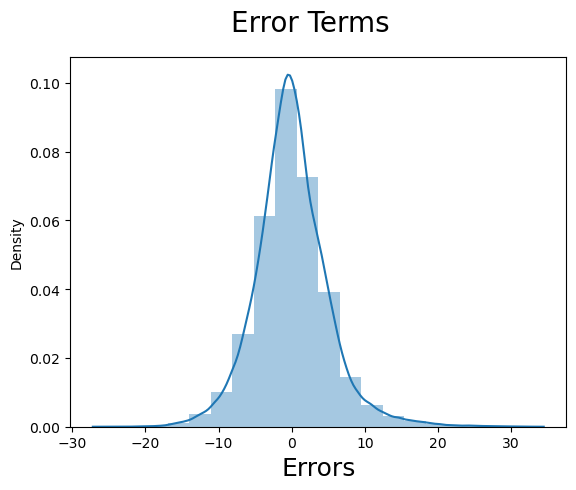

In [83]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Weekend got an impact on the time_taken_min



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> This indicates 20% data is used for Test and 80% data used to train the model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Outliners are identified using the box graph. Dropped the rows which are > 100 minutes.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

total_outstanding_orders
created_hour
isweekend




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value.  In case of simple Linear regression, we take one dependent variable and one independent variable.  In case of Multi Linear regression we study the relationship between dependent variable and multiple variables.




---



**Answer:**
> In simple linear regression we study the relationship between one Independent variable and one dependent variable.  Example, market spend and sales value.
> In case of mulitple linear regression, we try to understand the relationship between target varable and mulitple other variables.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Cost Function is used to minimize the prediction errors. It measures the average squared difference between predicted and actual values




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> If a model learns the training data too well, it is called overfitting.  if the model failed to capture the underlying pattern it is called underfitting.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual is the difference between the Actual and Predicted values. So, a residual plot helps in visualizing the difference between the actual and predicted values to understand the model fitment.